In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from utils import constants as cnst
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pickle as pkl
import pandas

%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [11]:
df = pd.read_csv('/home/ck/DIR/cornkle/data/nflics/core_gauge_comparison_ANACIM/Position_MOD.csv')

In [13]:
df.longitude

0    -16.760100
1    -16.698700
2    -16.703230
3    -16.759650
4    -16.717430
5    -16.679340
6    -16.746000
7    -16.764330
8    -16.750000
9    -16.698580
10   -16.713820
11   -16.743670
12   -16.725220
13   -16.707040
14   -16.722290
15   -16.740240
16   -16.726270
17   -16.792715
18   -16.800000
19   -16.727330
20   -17.467030
21   -17.098030
22   -17.098030
23   -17.161530
24   -17.124580
25   -17.057210
26   -16.905470
27   -17.005790
28   -16.867140
29   -16.774710
30   -16.837010
31   -16.753010
32   -16.597290
33   -16.473710
34   -16.568750
35   -16.679010
Name: longitude, dtype: float64

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



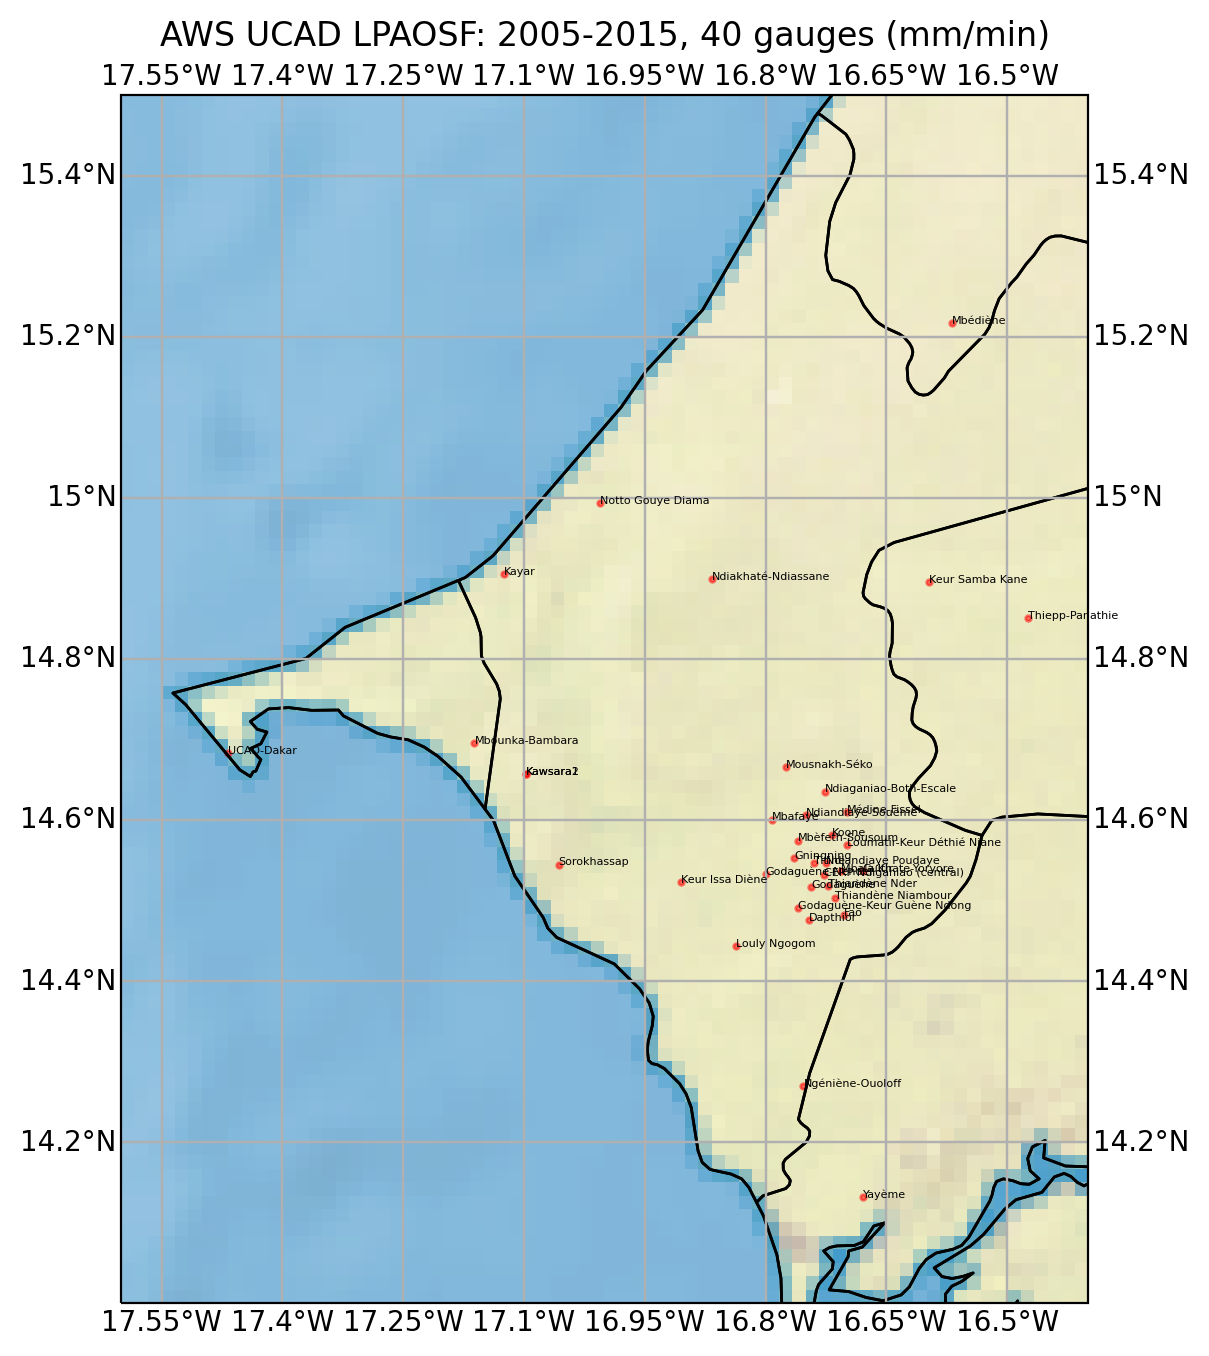

In [80]:
fig = plt.figure(figsize=(10,8), dpi=200)

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

#ax.set_global()

ax.add_feature(feature.COASTLINE, edgecolor="k")
ax.add_feature(feature.BORDERS, edgecolor="tomato")
ax.gridlines()
#ax.background_img(name='NaturalEarthRelief', resolution='high')
#ax.coastlines(resolution='10m')
#ax.add_feature(cartopy.feature.NaturalEarthFeature("physical", "land", "10m"))
gl = ax.gridlines(draw_labels=True)

import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
shpfilename = '/home/ck/DIR/cornkle/data/ancils_python/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'
province_shapes = shpreader.Reader(shpfilename).geometries()
ax.add_geometries(province_shapes, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black')

import rasterio
import rasterio.plot
filename = '/home/ck/DIR/cornkle/data/ancils_python/NE1_HR_LC_SR_W_DR/NE1_HR_LC_SR_W_DR.tif'
#filename = '/path/to/NE1_HR_LC_SR_W_DR.tif'
with rasterio.open(filename) as src:
    rasterio.plot.show(src, ax=ax, cmap='terrain', alpha=1, vmin=-1000, vmax=4000)
    rasterio.plot.show(src, ax=ax, cmap='ocean', alpha=0.4, vmin=-1000, vmax=4000)



lat1, lon1, lat2, lon2 = 10, -19, 20, -5
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())

ax.set_xlim(-17.6,-16.4)
ax.set_ylim(14,15.5)

plt.scatter(x=df.longitude, y=df.latitude,
            color="red",
            s=4,
            alpha=0.5,
            transform=ccrs.PlateCarree()) 
for ix, dff in df.iterrows():
    #
    #ipdb.set_trace()
    plt.text(dff.longitude, dff.latitude, dff.village, transform=ccrs.PlateCarree(), fontsize=4)

ax.set_title('AWS UCAD LPAOSF: 2005-2015, 40 gauges (mm/min)')
plt.tight_layout()
fig.savefig('/home/ck/DIR/cornkle/figs/nflics/core_gauge_comparison_ANACIM/UCAD_stations.pdf')
